station-control-client version '9.8.0' is newer minor version than '9.4.0' used by the station control server, some new client features might not be supported.


Job ID: 4da932ba-4bb7-4080-bd0e-8ae16c42b1c1


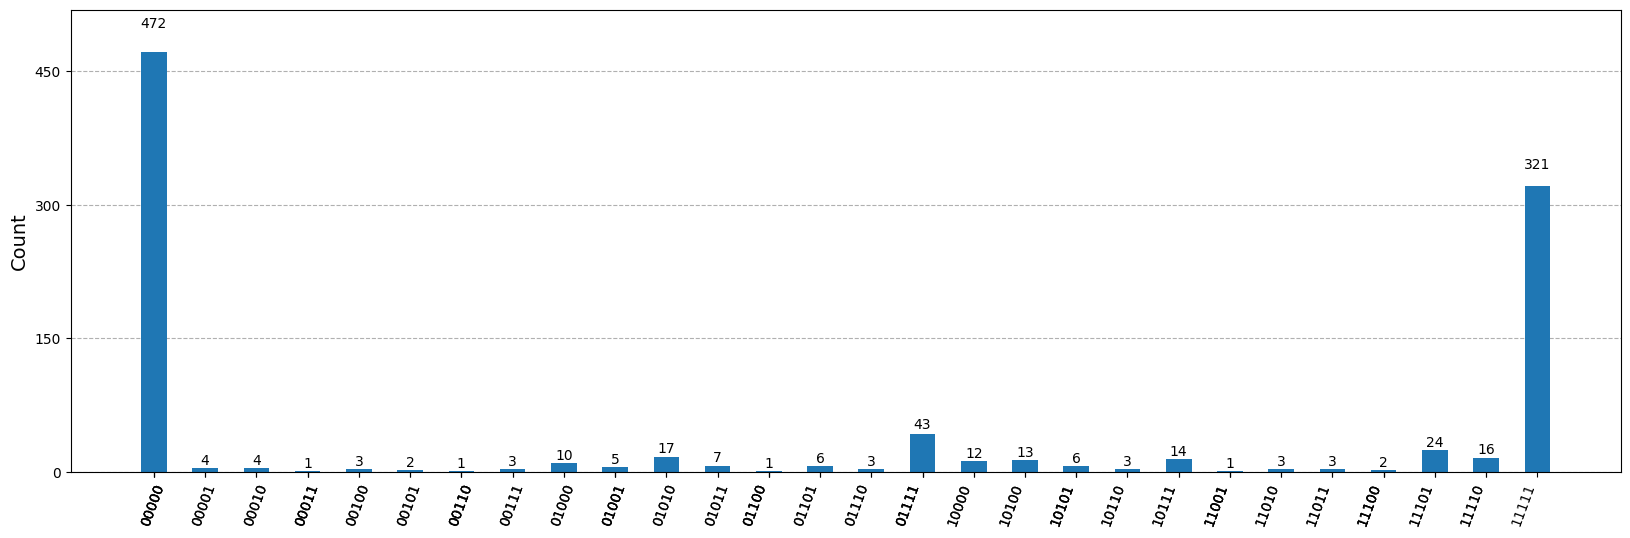

{'00000': 472, '10111': 14, '11111': 321, '11110': 16, '01011': 7, '01111': 43, '00111': 3, '10101': 6, '01101': 6, '11101': 24, '11100': 2, '00100': 3, '01010': 17, '11010': 3, '01001': 5, '10110': 3, '10000': 12, '10100': 13, '00010': 4, '00001': 4, '01000': 10, '11011': 3, '00110': 1, '00101': 2, '01110': 3, '01100': 1, '11001': 1, '00011': 1}


In [4]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from iqm.qiskit_iqm import IQMProvider
import os
import matplotlib.pyplot as plt
import numpy as np

os.environ["IQM_TOKENS_FILE"] = r"/home/xederro/.cache/iqm-client-cli/tokens.json"

IQM_URL = "https://odra5.e-science.pl/station"
provider = IQMProvider(IQM_URL)
backend = provider.get_backend()
qc = QuantumCircuit(5)
qc.h(0); qc.cx(0, 1); qc.cx(0, 2); qc.cx(1, 3); qc.cx(2, 4); qc.measure_all()
tqc = transpile(qc, backend=backend)
job = backend.run(tqc, shots=1000)
print("Job ID:", job.job_id())
result = job.result()
result.get_counts()

counts = result.get_counts()

fig, ax = plt.subplots(figsize=(20, 6))
plot_histogram(counts, ax=ax)

desired_ticks = 2**6   ### decreasing the total number of tick labels to have a clean figure
x_ticks = np.linspace(0, len(counts)-1, desired_ticks, dtype=int)
ax.set_xticks(x_ticks)

plt.show()
print(result.get_counts())